## Разберемся с распределением Лапласа

Плотность вероятности:
$$f(x) = \frac{\alpha}{2} e^{-\alpha |x - \beta|} $$
Функия распределения:

$$F(x) = \frac{\alpha}{2} \int\limits_{-\infty}^x e^{-\alpha |t - \beta|} dt$$
$\alpha$ - коэффициент масштаба, $\beta \in \mathbb{R}$ - коэффициент сдвига.

Для нашего распредления:
 - Мат ожидание $ = \beta$
 - Медиана $ = \beta$
 - Мода $ = \beta$
 - Дисперсия $ = \frac{2}{\alpha^2}$

### Добавим необходимые библиотеки

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import seaborn; seaborn.set() # красивый график

### Определим функцию плотности распределения Лапласа и нормального распределения, а также функцию подсчета стандартного отклонения нормального распределения 

In [ ]:
def laplace_dens(x, alpha = 1, beta = 0):
    return alpha/2 * np.exp(-alpha * abs(x-beta))

def norm(x, sigma, mu = 0):
    return 1/(np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2))

def sigma_norm(n, alpha=1): 
    return np.sqrt(2/(alpha**2)) / np.sqrt(n)

### Сгенерируем выборку 
Используем функцию scipy.stats.laplace.rvs() чтобы сгенерировать выборку этого распредления.

In [ ]:
selection = lambda x: sts.laplace.rvs(size = x)

### Построим гистограмму распределения и поверх него построим теоретическую плотность

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
n, bins, patches = ax.hist(selection(1000),100, density = True)
ax.plot(bins, laplace_dens(bins), '--', c = 'y')
plt.xlim(-7.5,7.5)
ax.legend(['theoretical density', 'generated selection'])

ax.set_title('Lapalace distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

### В лоб по "тупому" создадим 5 выборок выборочного среднего при n = (10,100,1000,10000)

In [207]:
n = [10,100,1000,10000,100000, 1000000]
mean0 = []
mean1 = []
mean2 = []
mean3 = []
mean4 = []
mean5 = []
for i in range(1000):
    mean0.append(np.mean(selection(n[0])))
    mean1.append(np.mean(selection(n[1])))
    mean2.append(np.mean(selection(n[2])))
    mean3.append(np.mean(selection(n[3])))
    mean4.append(np.mean(selection(n[4])))
    mean5.append(np.mean(selection(n[5])))


### Построим диаграммы и график Гаусовой плотности вероятности для значиений n = (10,100)

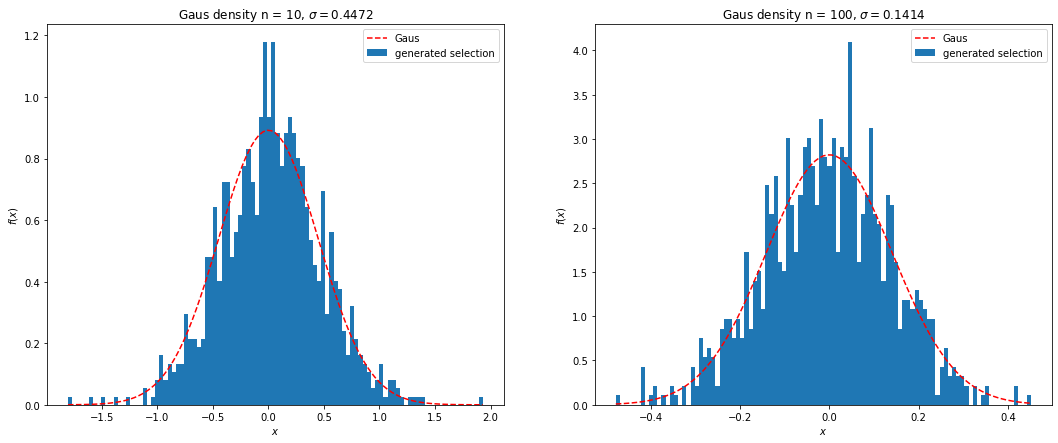

In [226]:

fig, ax = plt.subplots(1,2, figsize = (18,7))

k, bins, patches = ax[0].hist(mean0, 100, density = True)
ax[0].plot(bins, norm(bins, sigma_norm(n[0])), '--', c = 'r')

k, bins, patches = ax[1].hist(mean1, 100, density = True)
ax[1].plot(bins, norm(bins, sigma_norm(n[1])), '--', c = 'r')

ax[0].legend(['Gaus', 'generated selection'])
ax[1].legend(['Gaus', 'generated selection'])

ax[0].set_title('Gaus density n = 10, $\sigma = {:.4f}$'.format(sigma_norm(10)))
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')

ax[1].set_title('Gaus density n = 100, $\sigma = {:.4f}$'.format(sigma_norm(100)))
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$f(x)$')

plt.show()

### Построим диаграммы и график Гаусовой плотности вероятности для значиений n = (1000,10000)

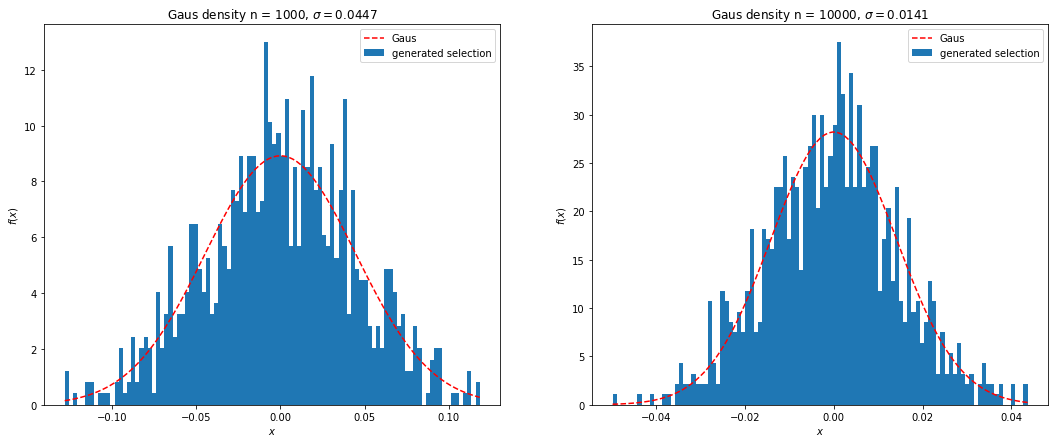

In [227]:
fig, ax = plt.subplots(1,2, figsize = (18,7))

k, bins, patches = ax[0].hist(mean2, 100, density = True)
ax[0].plot(bins, norm(bins, sigma_norm(n[2])), '--', c = 'r')

k, bins, patches = ax[1].hist(mean3, 100, density = True)
ax[1].plot(bins, norm(bins, sigma_norm(n[3])), '--', c = 'r')

ax[0].legend(['Gaus', 'generated selection'])
ax[1].legend(['Gaus', 'generated selection'])

ax[0].set_title('Gaus density n = 1000, $\sigma = {:.4f}$'.format(sigma_norm(1000)))
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')

ax[1].set_title('Gaus density n = 10000, $\sigma = {:.4f}$'.format(sigma_norm(10000)))
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$f(x)$')

plt.show()

### Построим диаграммы и график Гаусовой плотности вероятности для значиений n = (10000,100000)

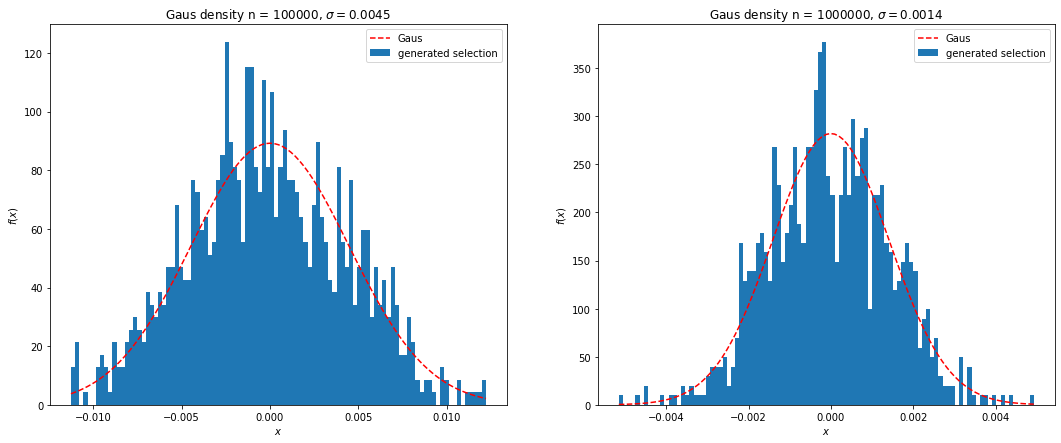

In [228]:
fig, ax = plt.subplots(1,2, figsize = (18,7))

k, bins, patches = ax[0].hist(mean4, 100, density = True)
ax[0].plot(bins, norm(bins, sigma_norm(n[4])), '--', c = 'r')

k, bins, patches = ax[1].hist(mean5, 100, density = True)
ax[1].plot(bins, norm(bins, sigma_norm(n[5])), '--', c = 'r')

ax[0].legend(['Gaus', 'generated selection'])
ax[1].legend(['Gaus', 'generated selection'])

ax[0].set_title('Gaus density n = 100000, $\sigma = {:.4f}$'.format(sigma_norm(100000)))
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')

ax[1].set_title('Gaus density n = 1000000, $\sigma = {:.4f}$'.format(sigma_norm(1000000)))
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$f(x)$')

plt.show()

### Вывод

В данной работе проводилась практическая проверка ЦПТ на примере распределения Лапласа.

С ростом объема выборок $n = 10 \rightarrow 10^6$ уменьшалась стандартное отклонение $\sigma = 0.4472 \rightarrow 0.0014$

### Экспериментик :)
Возьмем количество выборок 100000 и их объем n = 100000

И увидим как прекрасно работает ЦПТ! :)

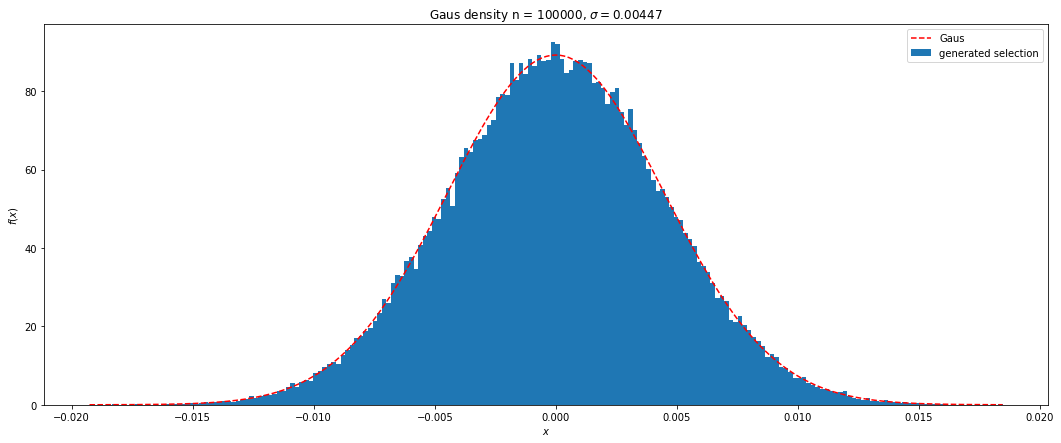

In [234]:
n1 = 100000
mean = []

for i in range(100000):
    mean.append(np.mean(selection(n1)))
    
fig, ax = plt.subplots( figsize = (18,7))

k, bins, patches = ax.hist(mean, 200, density = True)
ax.plot(bins, norm(bins, sigma_norm(n1)), '--', c = 'r')



ax.legend(['Gaus', 'generated selection'])


ax.set_title('Gaus density n = {}, $\sigma = {:.5f}$'.format(n1,sigma_norm(n1)))
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')


plt.show()